# Dealing with missing data
Identifying missing values in tabular data

In [1]:
import pandas as pd
from io import StringIO

In [2]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [3]:
df.head()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.tail()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [6]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [7]:
# remove rows that contain missing values

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [9]:
# only drop rows where all columns are NaN

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [10]:
# drop rows that have less than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [11]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


# Imputing missing values

In [12]:
# impute missing values via the column mean

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

Here, we replaced each NaN value with the corresponding mean, which is separately calculated for each feature column. If we changed the axis=0 setting to axis=1, we'd calculate the row means. Other options for the strategy parameter are median or most_frequent, where the latter replaces the missing values with the most frequent values.

In [13]:
# impute missing values via the column median

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [14]:
# impute missing values via the column mode

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  3.,  8.],
       [10., 11., 12.,  4.]])

In [15]:
df=pd.read_csv("C:/Users/param/Downloads/microbiome.csv")

In [16]:
df.head()

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305
1,Firmicutes,2,136,4182
2,Firmicutes,3,1174,703
3,Firmicutes,4,408,3946
4,Firmicutes,5,831,8605


In [17]:
df.tail()

,Taxon,Patient,Tissue,Stool
70,Other,11,203,6
71,Other,12,392,6
72,Other,13,28,25
73,Other,14,12,22
74,Other,15,305,32


In [18]:
df.describe()

,Patient,Tissue,Stool
count,75.000000,75.000000,75.000000
mean,8.000000,975.000000,723.786667
std,4.349588,1818.342659,1451.981733
min,1.000000,0.000000,0.000000
25%,4.000000,108.000000,16.000000
50%,8.000000,310.000000,80.000000
75%,12.000000,835.000000,656.000000
max,15.000000,12044.000000,8605.000000


In [19]:
df.isnull().sum()

Taxon      0
Patient    0
Tissue     0
Stool      0
dtype: int64

In [20]:
df_1=pd.read_csv("C:/Users/param/Downloads/kc_house_data.csv")

In [21]:
df_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df_1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
df_1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
df_1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
df.columns

Index(['Taxon', 'Patient', 'Tissue', 'Stool'], dtype='object')

In [26]:
df_5 = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

In [27]:
df_5.columns = ['color', 'size', 'price', 'classlabel']
df_5

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [28]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df_5['size'] = df_5['size'].map(size_mapping)
df_5

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [29]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df_5['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [30]:
import numpy as np

# create a mapping dict
# to convert class labels from strings to integers
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_5['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [31]:
# to convert class labels from strings to integers
df_5['classlabel'] = df_5['classlabel'].map(class_mapping)
df_5

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [32]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df_5['classlabel'] = df_5['classlabel'].map(inv_class_mapping)
df_5

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [33]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
class_le = LabelEncoder()
class_map = class_le.fit_transform(df_5['classlabel'].values)
class_map

array([0, 1, 0], dtype=int32)

In [34]:
# reverse mapping
class_le.inverse_transform(class_map)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

Performing one-hot encoding on nominal features

In [35]:
X = df_5[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [36]:


color_le = LabelEncoder()
color = color_le.fit_transform(df_5['color'].values)
color

array([1, 2, 0], dtype=int32)

If we stop at this point and feed the array to our classifier, we will make one of the most common mistakes in dealing with categorical data. Can you spot the problem? Although the color values don't come in any particular order, a learning algorithm will now assume that green is larger than blue, and red is larger than green. Although this assumption is incorrect, the algorithm could still produce useful results. However, those results would not be optimal.

A common workaround for this problem is to use a technique called one-hot encoding. The idea behind this approach is to create a new dummy feature for each unique value in the nominal feature column. Here, we would convert the color feature into three new features: blue, green, and red. Binary values can then be used to indicate the particular color of a sample; for example, a blue sample can be encoded as blue=1, green=0, red=0. To perform this transformation, we can use the OneHotEncoder that is implemented in the scikit-learn.preprocessing module:

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [38]:
# return dense array so that we can skip
# the toarray step

ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe.fit_transform(X)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

An even more convenient way to create those dummy features via one-hot encoding is to use the get_dummies method implemented in pandas. Applied to a DataFrame, the get_dummies method will only convert string columns and leave all other columns unchanged:

In [39]:
# one-hot encoding via pandas

pd.get_dummies(df_5[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


When we are using one-hot encoding datasets, we have to keep in mind that it introduces multicollinearity, which can be an issue for certain methods (for instance, methods that require matrix inversion). If features are highly correlated, matrices are computationally difficult to invert, which can lead to numerically unstable estimates. To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array. Note that we do not lose any important information by removing a feature column, though; for example, if we remove the column color_blue, the feature information is still preserved since if we observe color_green=0 and color_red=0, it implies that the observation must be blue.

If we use the get_dummies function, we can drop the first column by passing a True argument to the drop_first parameter, as shown in the following code example:

In [40]:
# multicollinearity guard in get_dummies

pd.get_dummies(df_5[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [41]:
# multicollinearity guard for the OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]# multicollinearity guard for the OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

# Partitioning a dataset into a seperate training and test set¶

In [42]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                          'ml/machine-learning-databases/'
                          'wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

First, we assigned the NumPy array representation of the feature columns 1-13 to the variable X; we assigned the class labels from the first column to the variable y. Then, we used the train_test_split function to randomly split X and y into separate training and test datasets. By setting test_size=0.3, we assigned 30 percent of the wine samples to X_test and y_test, and the remaining 70 percent of the samples were assigned to X_train and y_train, respectively. Providing the class label array y as an argument to stratify ensures that both training and test datasets have the same class proportions as the original dataset.

# Bringing features onto the same scale
Feature scaling is a crucial step in our preprocessing pipeline that can easily be forgotten. Decision trees and random forests are two of the very few machine learning algorithms where we don't need to worry about feature scaling. Those algorithms are scale invariant. However, the majority of machine learning and optimization algorithms behave much better if features are on the same scale, as we have seen in Chapter 2, Training Simple Machine Learning Algorithms for Classification, when we implemented the gradient descent optimization algorithm.

 normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns takes the form of a normal distribution, which makes it easier to learn the weights.

In [45]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

without sklearn

In [46]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


Selecting meaningful features
...

L1 and L2 regularization as penalties against model complexity
A geometric interpretation of L2 regularization¶

In [47]:
from IPython.display import Image

In [48]:
Image(url="https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch04/images/04_04.png")

In [49]:
# best way-code ![title](/notebooks/Downloads/04_04.png) 

![title](/notebooks/Downloads/04_04.png)

![title](/notebooks/Downloads/04_05.png) 

Sparse solutions with L1-regularization

![title](/notebooks/Downloads/04_06.png) 

For regularized models in scikit-learn that support L1 regularization, we can simply set the penalty parameter to 'l1' to obtain a sparse solution:

In [50]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [52]:
lr.intercept_

array([-1.26365696, -1.2157594 , -2.37049669])

Since we fit the LogisticRegression object on a multiclass dataset, it uses the One-versus-Rest (OvR) approach by default, where the first intercept belongs to the model that fits class 1 versus class 2 and 3, the second value is the intercept of the model that fits class 2 versus class 1 and 3, and the third value is the intercept of the model that fits class 3 versus class 1 and 2:

In [53]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [54]:
lr.coef_

array([[ 1.24609024,  0.18036537,  0.74506928, -1.16259057,  0.        ,
         0.        ,  1.16423946,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55270924,  2.50943696],
       [-1.53710901, -0.3872836 , -0.99557333,  0.36505018, -0.05959045,
         0.        ,  0.66838048,  0.        ,  0.        , -1.93396408,
         1.23346477,  0.        , -2.23166981],
       [ 0.13577061,  0.16837715,  0.3572031 ,  0.        ,  0.        ,
         0.        , -2.43866345,  0.        ,  0.        ,  1.56382508,
        -0.81879483, -0.49230826,  0.        ]])

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

 all feature weights will be zero if we penalize the model with a strong regularization parameter (Sparse solutions with L1 regularization); C is the inverse of the regularization parameter Sparse solutions with L1 regularization:

all feature weights will be zero if we penalize the model with a strong regularization parameter (Sparse solutions with L1 regularization); C is the inverse of the regularization parameter(c<0.1) Sparse solutions with L1 regularization:

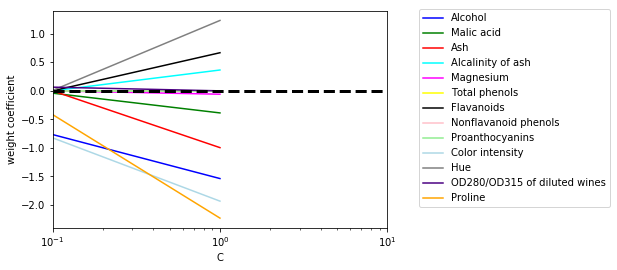

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-1., 1.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-1), 10**1])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

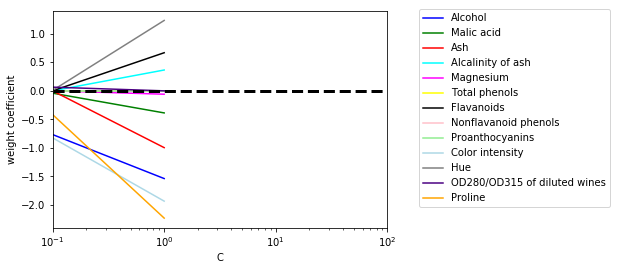

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-1., 1.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-1), 10**2])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

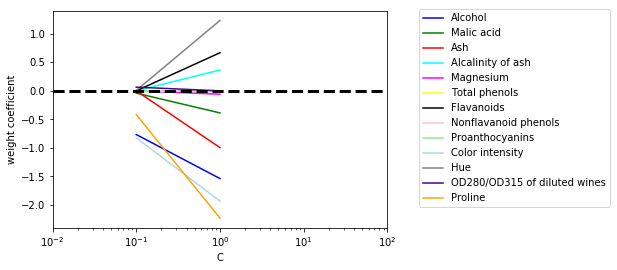

In [58]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-1., 1.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-2), 10**2])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

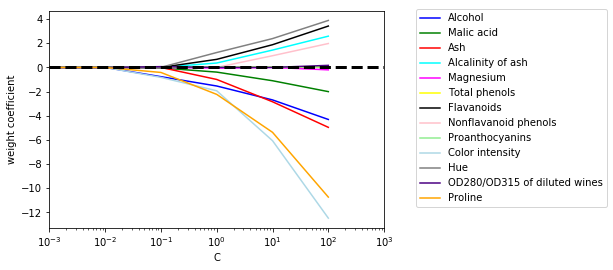

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-3., 3.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-3), 10**3])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=10**-1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9814814814814815


In [61]:
lr.coef_

array([[ 0.21947613,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54253133,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.5147259 ],
       [-0.76606597, -0.04064573,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.82382777,
         0.00714403,  0.06464596, -0.41592669],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.74283821,  0.        ,  0.        ,  0.42939312,
        -0.31956436, -0.5200121 ,  0.        ]])

In [62]:
lr.coef_[lr.coef_!=0].shape

(13,)

Sequencetial feature selection algorithms

Sequential Backward Selection (SBS)
1) Initialize algorithm with k=d, where d is dimensionality of full feature space.
2) Determine feature x^- that maximizes criterion.
3) Remove feature x^- from the feature set.
4) Terminate if k equals the number of desired features, if not go to step 2.
aka Backward stepwise selection

In [63]:
# from sklearn.base import clone
# from itertools import combinations
# import numpy as np
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import accuracy_score

# class SBS():
#     def __init__(self, estimator, k_features,
#                 scoring=accuracy_score,
#                 test_size=0.25, random_state=1):
#         self.scoring = scoring
#         self.estimator = clone(estimator)
#         self.k_features = k_features
#         self.test_size = test_size
#         self.random_state = random_state
        
#     def fit(self, X, y):
#         X_train, X_test, y_train, y_test = train_test_split(
#                         X, y, test_size=self.test_size,
#                         random_state = self.random_state)
        
#         dim = X_train.shape[1]
#         self.indices_ = tuple(range(dim))
#         self.subsets_ = [self.indices_]
#         score = self._calc_score(X_train, y_train,
#                                 X_test, y_test, self.indices_)
#         self.scores_ = [score]
        
#         while dim > self.k_features:
#             scores = []
#             subsets = []
            
#             for p in combinations(self.indices_, r=dim-1):
#                 score = self._calc_score(X_train, y_train,
#                                         X_test, y_test, p)
#                 scores.append(score)
#                 subsets.append(p)
            
#             best = np.argmax(score)
#             self.indices_ = subsets[best]
#             self.subsets_.append(self.indices_)
#             dim -= 1
            
#             self.scores_.append(scores[best])
#         self.k_score_ = self.scores_[-1]
        
#         return self
    
#     def transform(self, X):
#         return X[:, self.indices_]
    
#     def _calc_score(self, X_train, y_train,
#                            X_test, y_test, indices):
#         self.estimator.fit(X_train[:, indices], y_train)
#         y_pred = self.estimator.predict(X_test[:, indices])
#         score = self.scoring(y_test, y_pred)
#         return score
    
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, 
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, 
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

C:\Users\param\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
## SBS using KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

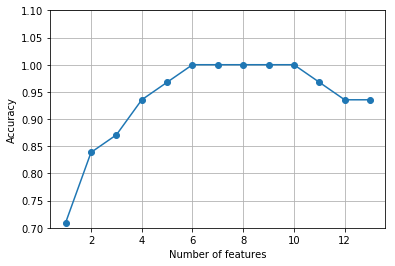

In [65]:
## plotting classification accuracy of knn
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

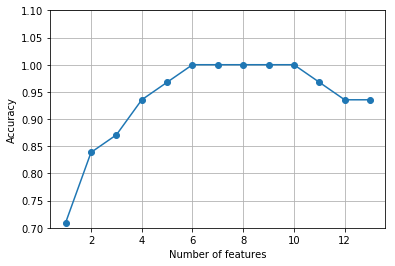

In [66]:
## plotting classification accuracy of knn

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

NOTE
can tell accuracy of KNN classifier improved on validation set as we reduced number of features, likely due to decrease of the curse of dimensionality.

In [67]:
## Let's see 5 features that yeilded good performance
k5 = list(sbs.subsets_[8])
print (df_wine.columns[1:][k5])

Index(['Alcohol', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids'],
      dtype='object')


In [68]:
## let's evaluate performance of KNN on original test set
knn.fit(X_train_std, y_train)
print ('Training accuracy:', knn.score(X_train_std, y_train))
print ('Testing accuracy:', knn.score(X_test_std, y_test))
## testing slightly lower, indicator of slight overfit

Training accuracy: 0.9596774193548387
Testing accuracy: 1.0


In [69]:
# let's use 5-feature subset from above
knn.fit(X_train_std[:, k5], y_train)
print ('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print ('Testing accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.967741935483871
Testing accuracy: 0.9259259259259259


NOTE
using less than half of the original features, our prediction accuracy on the test data imporove ~2%. And reduced overfitting, we can tell by the small gap between test accuracy and training accuracy

### Assessing feature importance with random forests

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
feat_labels = df_wine.columns[1:]

In [72]:
forest = RandomForestClassifier(n_estimators = 10000,
                               random_state = 0,
                               n_jobs = -1)

In [73]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) Proline                        0.183851
 2) Flavanoids                     0.165749
 3) Color intensity                0.157558
 4) OD280/OD315 of diluted wines   0.130049
 5) Alcohol                        0.113691
 6) Hue                            0.062726
 7) Total phenols                  0.052036
 8) Magnesium                      0.032533
 9) Malic acid                     0.027814
10) Alcalinity of ash              0.023071
11) Proanthocyanins                0.022359
12) Nonflavanoid phenols           0.014946
13) Ash                            0.013617


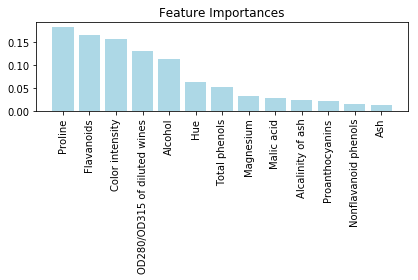

In [75]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color = 'lightblue',
       align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

scikit-learn also implements a transform method that selects features based on a user-specified threshold after model fitting, which is useful if we want to use the RandomForestClassifier as a feature selector and intermediate step in a scikit-learn pipeline, which allows us to connect different preprocessing steps with an estimator, as we will see in Chapter 6, Learning Best Practices for Model Evaluation and Hyperparameter Tuning. For example, we could set the threshold to 0.15 to reduce the dataset to the 3 most important features, Alcohol, Malic acid, and Ash using the following code:

In [76]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold = 0.1, prefit = True)
X_selected = sfm.transform(X_train)

In [77]:
X_selected.shape

(124, 5)

In [78]:
X_selected

array([[1.362000e+01, 8.000000e-01, 4.400000e+00, 2.050000e+00,
        5.500000e+02],
       [1.376000e+01, 2.740000e+00, 5.400000e+00, 3.000000e+00,
        1.235000e+03],
       [1.373000e+01, 3.250000e+00, 5.700000e+00, 2.710000e+00,
        1.285000e+03],
       [1.351000e+01, 2.530000e+00, 4.200000e+00, 2.870000e+00,
        1.095000e+03],
       [1.260000e+01, 6.600000e-01, 7.100000e+00, 1.580000e+00,
        6.950000e+02],
       [1.208000e+01, 2.290000e+00, 2.900000e+00, 3.190000e+00,
        3.850000e+02],
       [1.222000e+01, 2.040000e+00, 2.700000e+00, 3.020000e+00,
        3.120000e+02],
       [1.251000e+01, 5.800000e-01, 5.450000e+00, 1.510000e+00,
        6.500000e+02],
       [1.269000e+01, 1.460000e+00, 3.050000e+00, 2.060000e+00,
        4.950000e+02],
       [1.182000e+01, 1.640000e+00, 2.060000e+00, 2.440000e+00,
        4.150000e+02],
       [1.349000e+01, 1.840000e+00, 3.740000e+00, 2.780000e+00,
        4.720000e+02],
       [1.388000e+01, 3.560000e+00, 5.43000

Summary
We started this chapter by looking at useful techniques to make sure that we handle missing data correctly. Before we feed data to a machine learning algorithm, we also have to make sure that we encode categorical variables correctly, and we have seen how we can map ordinal and nominal features values to integer representations.

Moreover, we briefly discussed L1 regularization, which can help us to avoid overfitting by reducing the complexity of a model. As an alternative approach for removing irrelevant features, we used a sequential feature selection algorithm to select meaningful features from a dataset.

In the next chapter, you will learn about yet another useful approach to dimensionality reduction: feature extraction. It allows us to compress features onto a lower dimensional subspace rather than removing features entirely as in feature selection.